# Análisis Exploratorio de Datos (EDA)
Este notebook realiza un análisis exploratorio inicial sobre el conjunto de datos de titulares de noticias, con el fin de comprender su estructura, distribución y características clave antes de construir el modelo de clasificación.

# Dependencias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", None)

# Lectura de datos

In [2]:
# Leemos el archivo de datos
df = pd.read_json("../data/data.json")

# Vista general del dataset
df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY
3,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS


# Limpieza y filtrado

## Verificación de valores nulos

In [3]:
# Verificamos si existen valores nulos en alguna columna
df.isnull().sum()

headline    0
category    0
dtype: int64

**Nota:** No se encontraron valores nulos, por lo que no es necesario aplicar limpieza en este aspecto.

## Distribución de longitud de titulares

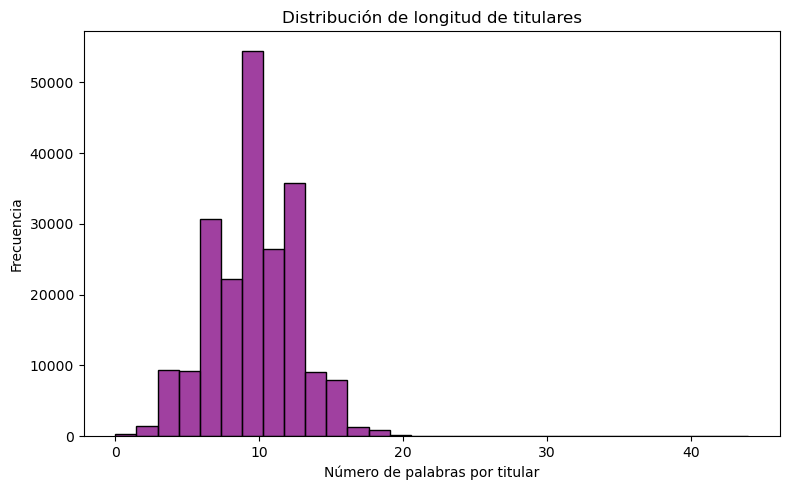

In [4]:
# Añadimos una columna con la longitud de cada titular
df['headline_length'] = df['headline'].apply(lambda x: len(x.split()))

# Histograma de la longitud de los titulares
plt.figure(figsize=(8,5))
sns.histplot(df['headline_length'], bins=30, color='purple')
plt.title('Distribución de longitud de titulares')
plt.xlabel('Número de palabras por titular')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


**Nota:** La mayoría de los titulares tienen entre 9 y 12 palabras. Esto es importante al considerar el preprocesamiento: por ejemplo, definir el tamaño del vocabulario, usar o no n-gramas, o evitar titulares demasiado cortos/largos.


Eliminando titulares demasiados cortos/largos:

In [5]:
# Identificamos titulares con longitud menor o igual a 3
titulares_cortos = df[df['headline_length'] <= 3]
print(f"Número de titulares con 3 palabras o menos: {len(titulares_cortos)}")

# Mostramos algunos ejemplos
titulares_cortos['headline'].head()

Número de titulares con 3 palabras o menos: 5023


4145                The Useful Idiot
9943               Corruption Is Bad
10562             Meeting Mr. Wright
13649    Re-Introducing The Flipside
16324                 Truth And Lies
Name: headline, dtype: object

In [6]:
# Eliminamos titulares con 3 palabras o menos
df = df[df['headline_length'] > 3].copy()

**Observación:** Algunos titulares contienen 3 palabras o menos, e incluso hay casos con longitud cero. Estos textos suelen carecer de contexto suficiente para que el modelo pueda extraer patrones útiles.

**Decisión:** Se eliminarán los titulares con 3 palabras o menos para reducir el ruido en el modelo de clasificación.


In [7]:
# Revisamos cuántos titulares superan las 20 palabras
titulares_largos = df[df['headline_length'] > 20]
print(f"Número de titulares con más de 20 palabras: {len(titulares_largos)}")

# Eliminamos esos titulares
df = df[df['headline_length'] <= 20].copy()

Número de titulares con más de 20 palabras: 214


**Nota:** También se eliminaron los titulares con más de 20 palabras (214 casos). Aunque no son incorrectos, son outliers en términos de longitud, lo que podría afectar el rendimiento del modelo y generar vectores de texto innecesariamente grandes.


## Guardar data limpia

In [8]:
df_clean = df[['headline', 'category', 'headline_length']]
df_clean[['headline', 'category']].to_csv("../data/data_clean.csv")

# Análisis exploratorio

## Distribución de clases

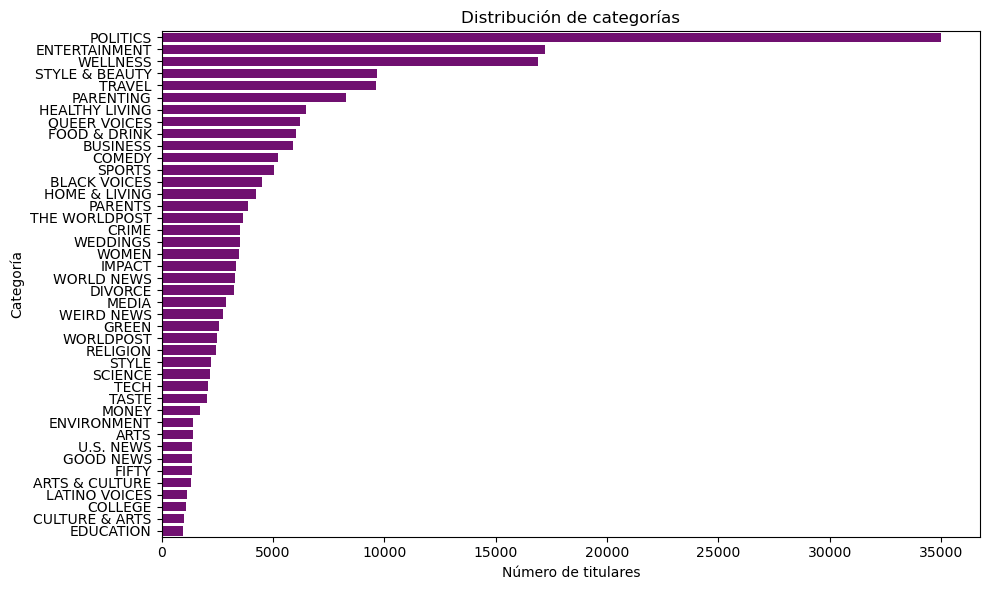

In [9]:
# Conteo de registros por categoría
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, y='category', order=df_clean['category'].value_counts().index, color='purple')
plt.title('Distribución de categorías')
plt.xlabel('Número de titulares')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

**Nota:** Las categorías están desbalanceadas. Esto se tomará en cuenta más adelante al aplicar técnicas de remuestreo como oversampling.

## Estadísticas básicas de longitud

In [10]:
print("Longitud mínima:", df_clean['headline_length'].min())
print("Longitud máxima:", df_clean['headline_length'].max())
print("Media:", df_clean['headline_length'].mean())
print("Mediana:", df_clean['headline_length'].median())

Longitud mínima: 4
Longitud máxima: 20
Media: 9.758945616525528
Mediana: 10.0


**Nota:** Después de eliminar los titulares con longitud menor o igual a 3 y mayor a 20 palabras, observamos que los titulares restantes tienen una longitud mínima de 4 y máxima de 20 palabras. La media es aproximadamente 9.76 y la mediana es 10, lo cual indica que la distribución está centrada y ligeramente sesgada hacia titulares más cortos.

Esto sugiere que los titulares son generalmente breves, lo que es esperable dado su naturaleza informativa. 

## Histograma de longitudes

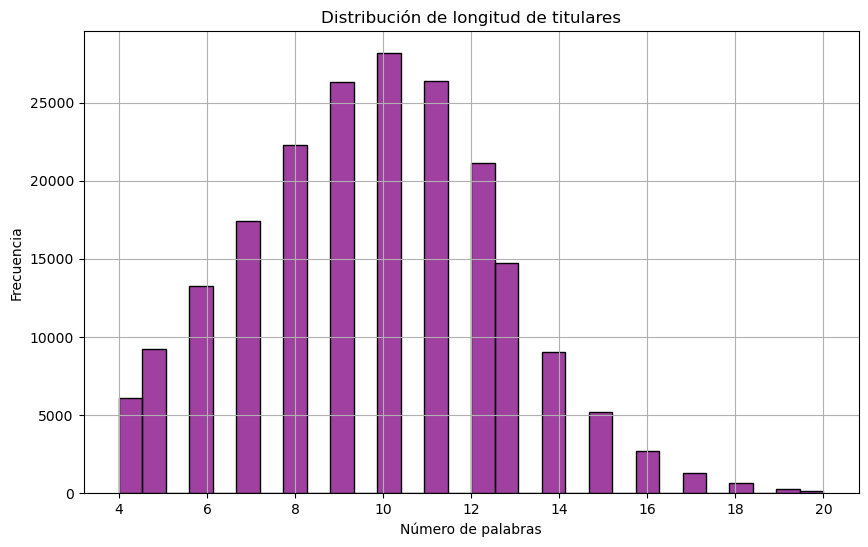

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['headline_length'], bins=30, color='purple')
plt.title("Distribución de longitud de titulares")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Conclusiones

1. Se eliminaron titulares con longitud menor o igual a 3 y mayor a 20 palabras para reducir ruido y estandarizar la entrada al modelo.

2. Las clases están distribuidas de forma desbalanceada.

3. La mayoría de los titulares tienen entre 9 y 12 palabras, lo cual indica una distribución centrada alrededor de titulares breves, como se espera en titulares periodísticos.

4. Se realizó una limpieza inicial enfocada en el filtrado por longitud, pero otras transformaciones como pasar a minúsculas, eliminar puntuación o stopwords se aplicarán en la etapa de preprocesamiento previo al modelado.